In [ ]:
from langchain.docstore.document import Document
from langchain.text_splitter import CharacterTextSplitter
from langchain.document_loaders import TextLoader
from langchain.vectorstores import Chroma
from langchain.embeddings import OllamaEmbeddings
import warnings
warnings.filterwarnings("ignore")

from langchain.tools import DuckDuckGoSearchRun
from langchain.tools import DuckDuckGoSearchResults
import pandas as pd
import time


In [ ]:

data = pd.read_csv("Microsoft_Purview_Classifiers_with_ddg.csv")

def combine_description_ddg(row):
    return row['ddg'] + "\n" + row['Description'] 

In [ ]:
data['detail'] = data.apply(lambda row: combine_description_ddg(row), axis=1)

In [ ]:
data['detail'].head()

In [ ]:
data= data[['Classifier', 'detail']]
data.columns = ['classifier', 'detail']
data.to_csv("Microsoft_Purview_Classifiers_with_ddg_to_load.csv", index=False)

In [ ]:
data.columns


In [ ]:
data.isnull().sum()

In [ ]:
len(data)

In [ ]:
from langchain.document_loaders import CSVLoader
 
# Load data from a CSV file using CSVLoader
loader = CSVLoader("Microsoft_Purview_Classifiers_with_ddg_to_load.csv", metadata_columns=["classifier"])
documents = loader.load()

In [ ]:
documents[0]

In [ ]:
documents[0].metadata.get("classifier")

In [ ]:
documents[0].metadata

In [ ]:
documents[0].page_content

In [ ]:
len(documents)

# ChromaDB

https://docs.trychroma.com/

https://python.langchain.com/docs/integrations/vectorstores/chroma

## Ollama
https://github.com/ollama/ollama

Install
curl https://ollama.ai/install.sh | sh

#### https://ollama.ai/library
ollama serve &

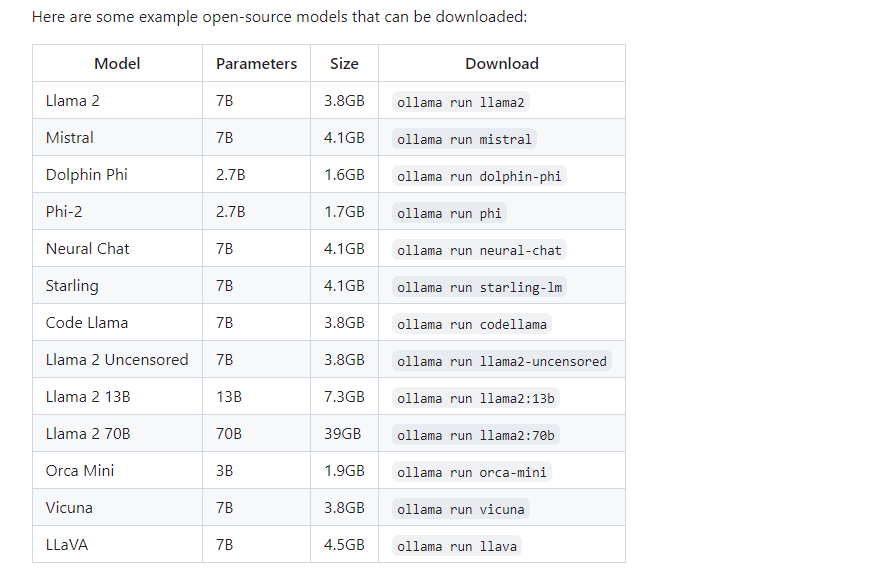

https://python.langchain.com/docs/integrations/text_embedding/ollama



In [ ]:
chroma_path = "./chroma"
#delete collection if this exists

In [ ]:

embeddings = OllamaEmbeddings(model="mistral", num_gpu=1, show_progress=True)

In [ ]:
db  = Chroma.from_documents(documents=documents,
                                 
                                 # Chose the embedding you want to use
                                 embedding=embeddings,
                                 collection_metadata = {"hnsw:space": "cosine"},
                                 persist_directory=chroma_path)

In [ ]:
query = """Lufthansa flies back to profit

German airline Lufthansa has returned to profit in 2004 after posting huge losses in 2003.

In a preliminary report, the airline announced net profits of 400m euros ($527.61m; £274.73m), compared with a loss of 984m euros in 2003. Operating profits were at 380m euros, ten times more than in 2003. Lufthansa was hit in 2003 by tough competition and a dip in demand following the Iraq war and the killer SARS virus. It was also hit by troubles at its US catering business. Last year, Lufthansa showed signs of recovery even as some European and US airlines were teetering on the brink of bankruptcy. The board of Lufthansa has recommended paying a 2004 dividend of 0.30 euros per share. In 2003, shareholders did not get a dividend. The company said that it will give all the details of its 2004 results on 23 March.
"""
docs_with_score = db.similarity_search_with_score(query, k=5)

In [ ]:
for doc, score in docs_with_score:
    print("-" * 80)
    print("Score: ", score)
    print(doc.page_content)
    print("-" * 80)
    print(f"Class {doc.metadata.get('classifier')}")
    print("-" * 80)

In [ ]:
db.embeddings

In [ ]:
docs_with_score = db.similarity_search_with_relevance_scores(query, k=5)

In [ ]:
for doc, score in docs_with_score:
    print("-" * 80)
    print("Score: ", score)
    print(doc.page_content)
    print("-" * 80)
    print(f"Class {doc.metadata.get('classifier')}")
    print("-" * 80)